In [1]:
import json
import pprint
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
!ls ../data

motion_energy_pilot15-19.csv  Pilot15	  pilot2.csv	   Pilot8
Pilot10			      Pilot15-19  pilot2.mat	   Pilot9
Pilot11			      Pilot16	  pilot3_FIRA.csv  subj_metadata.json
Pilot12			      Pilot17	  Pilot4	   test
Pilot13			      Pilot18	  Pilot5
Pilot13-14		      Pilot19	  Pilot6
Pilot14			      pilot1.csv  Pilot7


In [4]:
with open('../data/subj_metadata.json') as f:
    d = json.load(f)

In [5]:
num_subjects=len(d)

In [6]:
subject_th = []
for subject in d:
    th = []

    sessions = d[subject]
    for session in sessions:
        counter = 0
        blocks = sessions[session]
        for block in blocks:
            if block == 'Quest':
                quest_block = blocks[block]
                try:
                    param = quest_block['QuestFit'][0]
                except KeyError:
                    pass
                else:
                    assert quest_block['QuestFit'][1:] == [2, 0.5, 0.001]
                    assert quest_block['completed'] == 1
                    assert counter < 2
                    counter += 1
                    th.append(param)
    subject_th.append(th)
pprint.pprint(subject_th)

[[18.5, 34.5, 48.5],
 [24.5, 22, 33.5],
 [51.5, 34, 26.5],
 [30.5, 30.5],
 [100, 62]]


(0, 105)

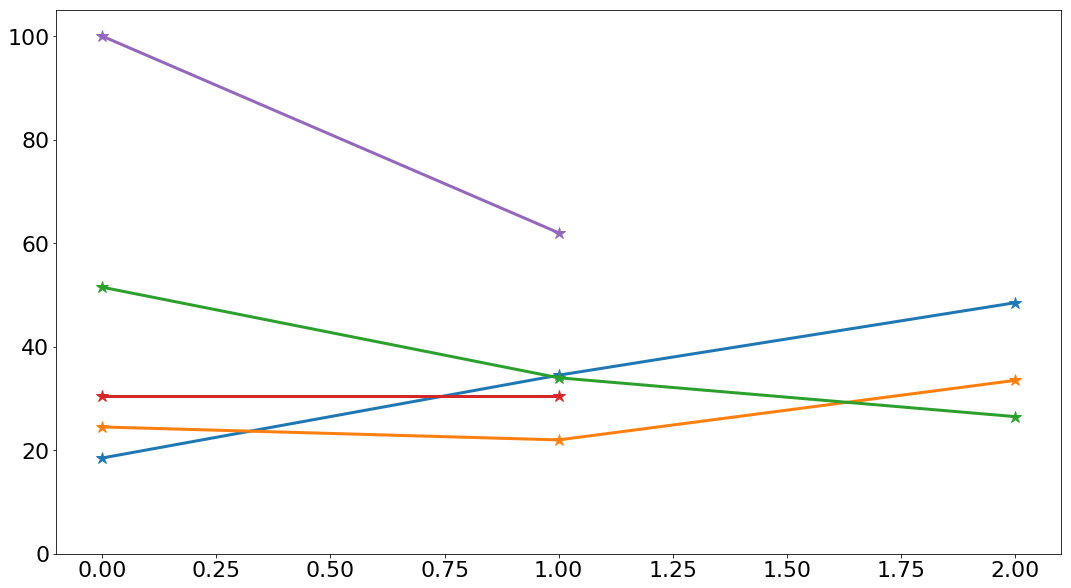

In [7]:
plt.rcParams.update({'font.size': 22})
fig = plt.figure(figsize=(18, 10))
for s in subject_th:
    num_th = len(s)
    plt.plot(range(num_th), s, '*-', linewidth=3, markersize=13)
plt.ylim(0,105)
# plt.legend()